# Diabetes Risk Prediction: Exploratory Data Analysis (EDA)

## 1. Introduction
This project aims to analyze and predict the risk of diabetes based on several health indicators and lifestyle factors. By understanding the correlations between variables we can build a predictive model to identify high-risk individuals early.

**Dataset Source:** Kaggle - Diabetes Risk Prediction Dataset.
**Target Variable:** `diabetes_risk_category` (Low Risk, Prediabetes, High Risk).

## 2. Data Dictionary

The dataset contains the following features:

### **Demographics & Physical Metrics**
* **Patient_ID:** Unique identifier for each patient.
* **Age:** Age of the patient (years).
* **Gender:** Biological sex (Male/Female).
* **BMI:** Body Mass Index ($kg/m^2$).
* **Waist_Circumference_cm:** Measurement around the waist in centimeters.

### **Medical Indicators**
* **Blood_Pressure:** Systolic blood pressure ($mmHg$).
* **Fasting_Glucose_Level:** Blood sugar levels after fasting ($mg/dL$).
* **Insulin_Level:** Current insulin concentration in the blood.
* **HbA1c_Level:** Average blood sugar levels over the past 2-3 months.
* **Cholesterol_Level:** Total blood cholesterol levels ($mg/dL$).
* **Triglycerides_Level:** Type of fat found in the blood.

### **Lifestyle & History**
* **Physical_Activity_Level:** Frequency of exercise (Low, Moderate, High).
* **Daily_Calorie_Intake:** Average calories consumed per day.
* **Sugar_Intake_grams_per_day:** Grams of sugar consumed daily.
* **Sleep_Hours:** Average sleep duration per night.
* **Stress_Level:** Self-reported stress scale.
* **Family_History_Diabetes:** Genetic predisposition (Yes/No).

### **Target Variable**
* **Diabetes_Risk_Score:** Numeric risk estimation.
* **Diabetes_Risk_Category:** Categorized risk level (Target).

## 3. Objectives

- **Identify Missing Data:** Check for null values, duplicates and data consistency.
- **Analyze Class Imbalance:** Determine if the risk categories are balanced or if we need techniques like SMOTE.
- **Correlation Analysis:** Find which medical indicators have the strongest impact on the risk score.
- **Outlier Detection:** Inspect features for extreme values that might skew the model.

## 4. Statistical Description & Initial Findings

Before deep-diving into visualizations, we execute a statistical summary to identify:
* **Scale differences:** Are features in the same range (e.g., Age vs. Cholesterol)?
* **Potential Outliers:** Do max/min values make biological sense?
* **Class Imbalance:** How many samples exist for each risk category?

In [21]:
# Imports
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

### Data Loading

In [22]:
# Add project root so "src" can be imported from the notebook
project_root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.insert(0, str(project_root))

# Define the relative path to the file from the project root
data_path = "/Users/josedrube/Documents/Diabetes_Risk_Prediction/Diabetes_Risk_Prediction/src/data/diabetes_risk_dataset.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Verify the load
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset loaded with 6000 rows and 19 columns.


,Patient_ID,age,gender,bmi,blood_pressure,fasting_glucose_level,insulin_level,HbA1c_level,cholesterol_level,triglycerides_level,physical_activity_level,daily_calorie_intake,sugar_intake_grams_per_day,sleep_hours,stress_level,family_history_diabetes,waist_circumference_cm,diabetes_risk_score,diabetes_risk_category
0,1,77,Female,33.8,154,93,12.1,5.2,242,194,Low,2169,78.4,8.1,4,No,101.1,52.3,Prediabetes
1,2,54,Male,19.2,123,94,4.6,5.4,212,76,High,1881,16.5,6.6,3,No,60.0,3.7,Low Risk
2,3,25,Male,33.7,141,150,10.8,6.9,247,221,Low,2811,147.9,6.7,10,Yes,114.7,87.3,High Risk
3,4,23,Female,32.8,140,145,11.6,6.8,195,193,Low,2826,98.3,4.4,9,Yes,96.6,76.1,High Risk
4,5,70,Male,33.7,165,90,18.3,5.6,217,170,Moderate,2610,65.8,9.1,5,Yes,107.4,47.7,Prediabetes


### **4.1. General Description**

In [23]:
# Statistical summary of numerical features
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Patient_ID,6000.0,3000.500000,1732.195139,1.0,1500.75,3000.50,4500.25,6000.0
age,6000.0,52.230667,18.757508,20.0,36.00,53.00,68.00,84.0
bmi,6000.0,32.939667,7.510155,16.0,26.90,32.75,38.50,50.0
blood_pressure,6000.0,144.482500,17.867248,91.0,132.00,144.00,157.00,200.0
fasting_glucose_level,6000.0,106.105500,31.213994,60.0,87.00,96.00,114.00,281.0
insulin_level,6000.0,15.080333,9.245581,2.0,7.10,13.80,21.00,55.9
HbA1c_level,6000.0,5.784583,0.956614,4.1,5.20,5.50,6.10,11.0
cholesterol_level,6000.0,217.490667,24.888595,139.0,200.00,217.00,234.00,309.0
triglycerides_level,6000.0,177.351500,51.897606,50.0,137.00,173.00,213.00,383.0
daily_calorie_intake,6000.0,2479.547000,548.410642,1200.0,2055.00,2385.00,2848.25,5249.0


In [24]:
from src.diabetes_risk_prediction.utils.eda_functions import get_data_summary
get_data_summary(df)

--- DATASET SUMMARY ---
Total Rows: 6000
Total Columns: 19

--- MISSING VALUES ---
No missing values found.

--- DUPLICATES ---
Duplicate rows: 0

--- DATA TYPES ---
Patient_ID                      int64
age                             int64
gender                            str
bmi                           float64
blood_pressure                  int64
fasting_glucose_level           int64
insulin_level                 float64
HbA1c_level                   float64
cholesterol_level               int64
triglycerides_level             int64
physical_activity_level           str
daily_calorie_intake            int64
sugar_intake_grams_per_day    float64
sleep_hours                   float64
stress_level                    int64
family_history_diabetes           str
waist_circumference_cm        float64
diabetes_risk_score           float64
diabetes_risk_category            str
dtype: object
------------------------------------------------------------


**Observations**

**There are no duplicates nor NaN in this dataset.**

### **4.2. Analysis of Target Variable (Diabetes Risk Category)**

Class Distribution (%):
diabetes_risk_category
Low Risk       43.366667
High Risk      37.416667
Prediabetes    19.216667
Name: proportion, dtype: float64


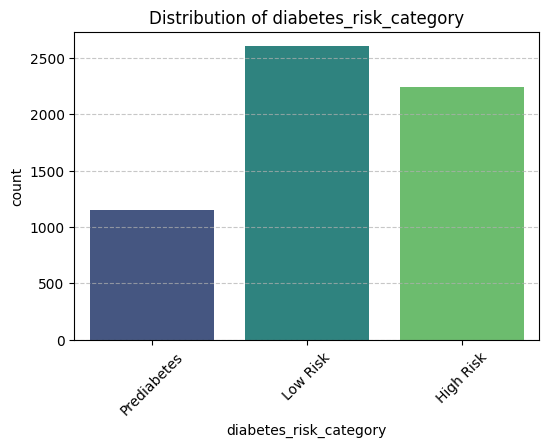

In [25]:
from src.diabetes_risk_prediction.utils.eda_functions import plot_distribution

# Calculate percentages
proportions = df['diabetes_risk_category'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(proportions)

# Visualization
plot_distribution(df, 'diabetes_risk_category')

**Observations:**
* **Distribution:** * **Low Risk:** ~43.4%
    * **High Risk:** ~37.4%
    * **Prediabetes:** ~19.2%
* **Balance:** The dataset shows a slight imbalance in the distribution of "Prediabetes" category for a classification problem. "Low Risk" & "High Risk" have a healthy relation with only a 6% difference.

**Initial Interpretation:**
As the minority class (Prediabetes) represents 19% of the data, we will probably use **SMOTE** for the classification.

### **4.3. Demographic & Metabolic Metrics**

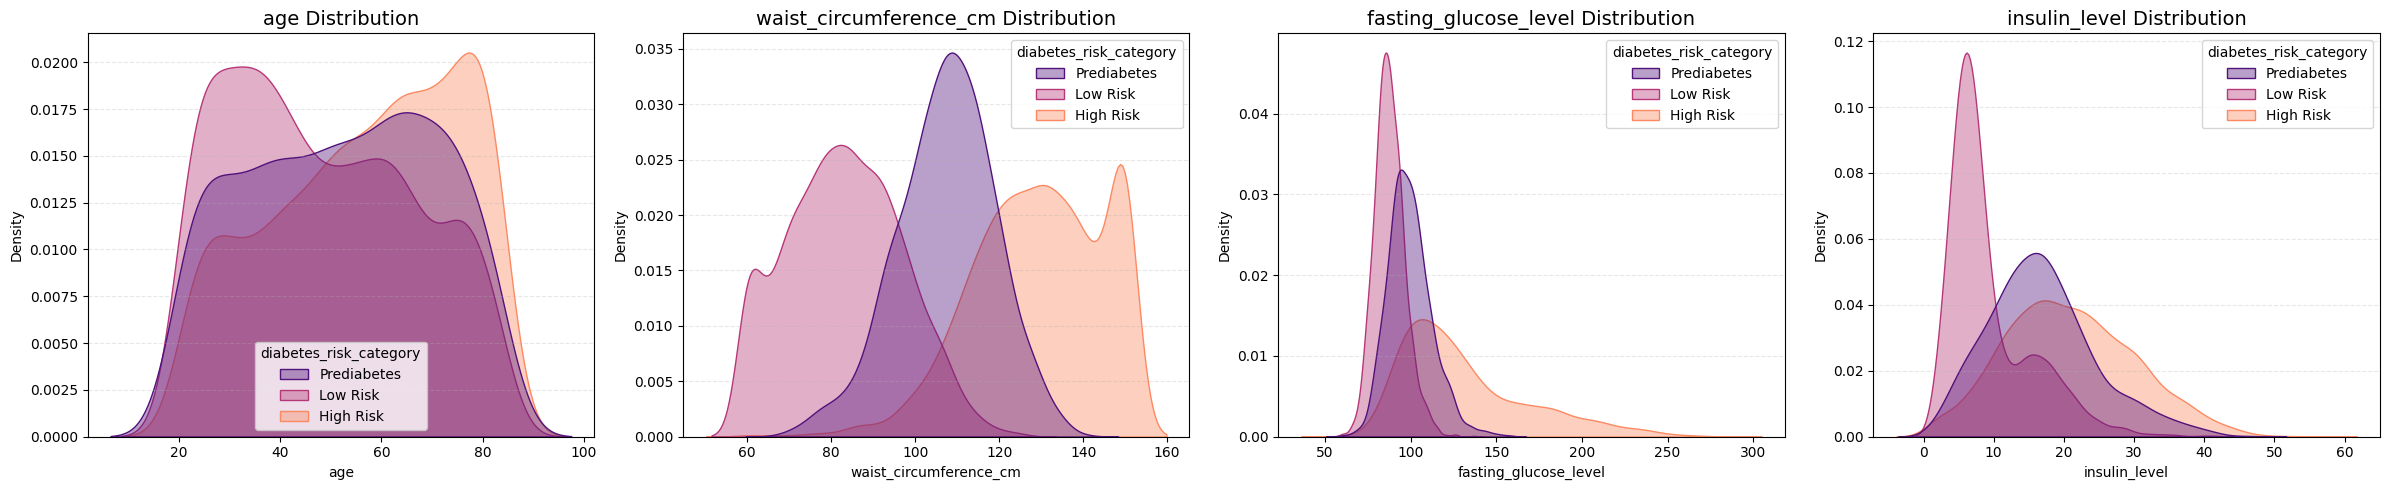

In [26]:
from src.diabetes_risk_prediction.utils.eda_functions import plot_multiple_comparison_kde
plot_multiple_comparison_kde(df, ['age','waist_circumference_cm','fasting_glucose_level','insulin_level'])

#### **1. Age**
* **Observations:** Risk increases with age. The Low Risk distribution has a younger peak (from 20 to 40 years), whereas the High Risk group is shifted toward the older demographic (~65 to 85 years).
* **Interpretation:** Age is a known biological risk factor. Including it helps the model account for the natural decline in insulin sensitivity over time.

#### **2. Waist Circumference**
* **Observations:** This graph shows very little overlap between the extremes. Low Risk patients average 83cm, while High Risk patients average nearly 130cm. There is a clear pattern and waist circumference cm is directly proportional to the diabetes risk.
* **Interpretation:** Waist circumference is often a better predictor of Type 2 Diabetes than weight alone because it measures visceral fat.

#### **3. Insulin Level**
* **Observations:** The High Risk curve is significantly higher (~20.8) than the Low Risk curve (~9.3).
* **Interpretation:** High insulin levels often indicate insulin resistance (where the body produces more to compensate). This is a direct physiological marker of diabetes progression.

### **4.4. Cardiovascular & Lipid Indicators**

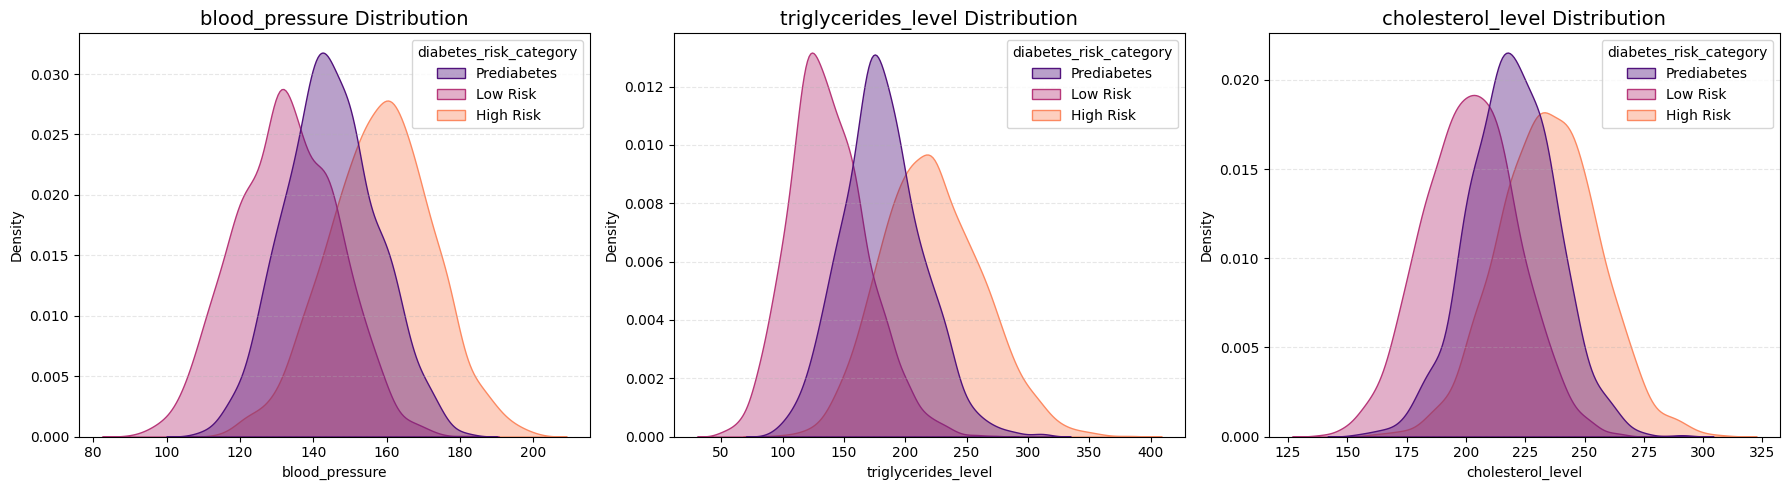

In [27]:
plot_multiple_comparison_kde(df, ['blood_pressure','triglycerides_level', 'cholesterol_level'])

#### **1. Blood Pressure**
* **Observations:** There is a clear upward shift in blood pressure as risk increases. Low Risk patients center around 132 mmHg, while High Risk patients show a much broader distribution peaking near 158 mmHg.
* **Interpretation:** Hypertension seems to be correlated with diabetes risk. The wide spread in the High Risk category suggests that while high blood pressure is a common indicator, it varies significantly among diabetic patients.

#### **2. Triglycerides & Cholesterol**
* **Observations:** Triglycerides show some separation as well. Low Risk levels are concentrated around 137 mg/dL, while High Risk levels jump to an average of 221 mg/dL. Cholesterol follows a similar but slightly more overlapped trend.
* **Interpretation:** Lipid profiles (especially Triglycerides) are excellent predictors. The significant gap between Low and High Risk indicates that metabolic syndrome (high fats in blood) is a primary characteristic of the High Risk group in this dataset.

### **4.5. Analysis of Key Predictors: BMI & HbA1c**

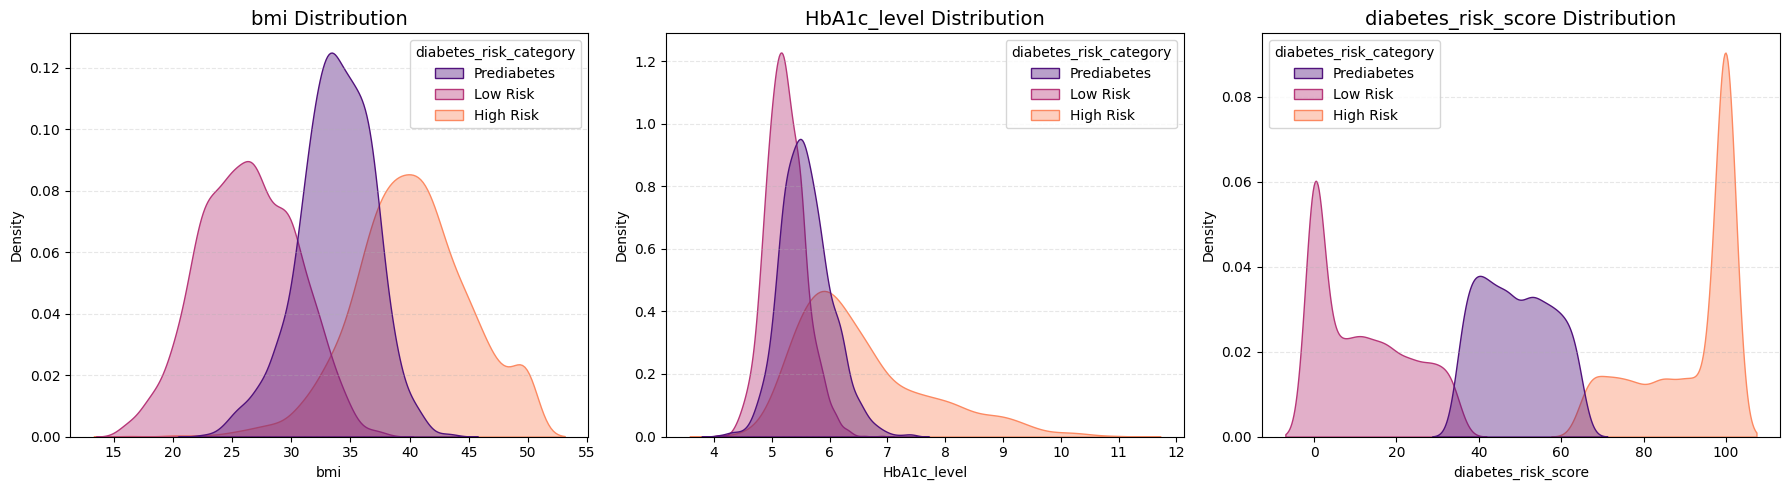

In [ ]:
plot_multiple_comparison_kde(df, ['bmi', 'HbA1c_level'])

#### **1. BMI (Body Mass Index)**
* **Observations:** We observe three very distinct hills. The **Low Risk** group is concentrated in the healthy-to-overweight range (Median: **26.3**), while **Prediabetes** moves into Class I Obesity (Median: **33.8**), and **High Risk** sits deep in Class II/III Obesity (Median: **40.1**).
* **Interpretation:** BMI is a remarkably consistent physical predictor in this dataset. The clear progression suggests that as BMI crosses the 30 and 35 thresholds, the statistical probability of moving into a higher risk category increases significantly.

#### **2. HbA1c Level**
* **Observations:** This graph shows the most precise separation of all medical markers. The **Low Risk** curve is tall and narrow (Median: **5.2**), indicating high stability. In contrast, the **High Risk** curve (Median: **6.2**) is much broader, capturing the high variability of blood sugar control in diabetic patients.
* **Interpretation:** HbA1c acts as a "Gold Standard" feature. Because it measures long-term glucose average, it provides a more stable classification signal than a single fasting glucose test, making it likely the most important feature for our machine learning model.

### **4.6. Lifestyle & Habitual Factors**

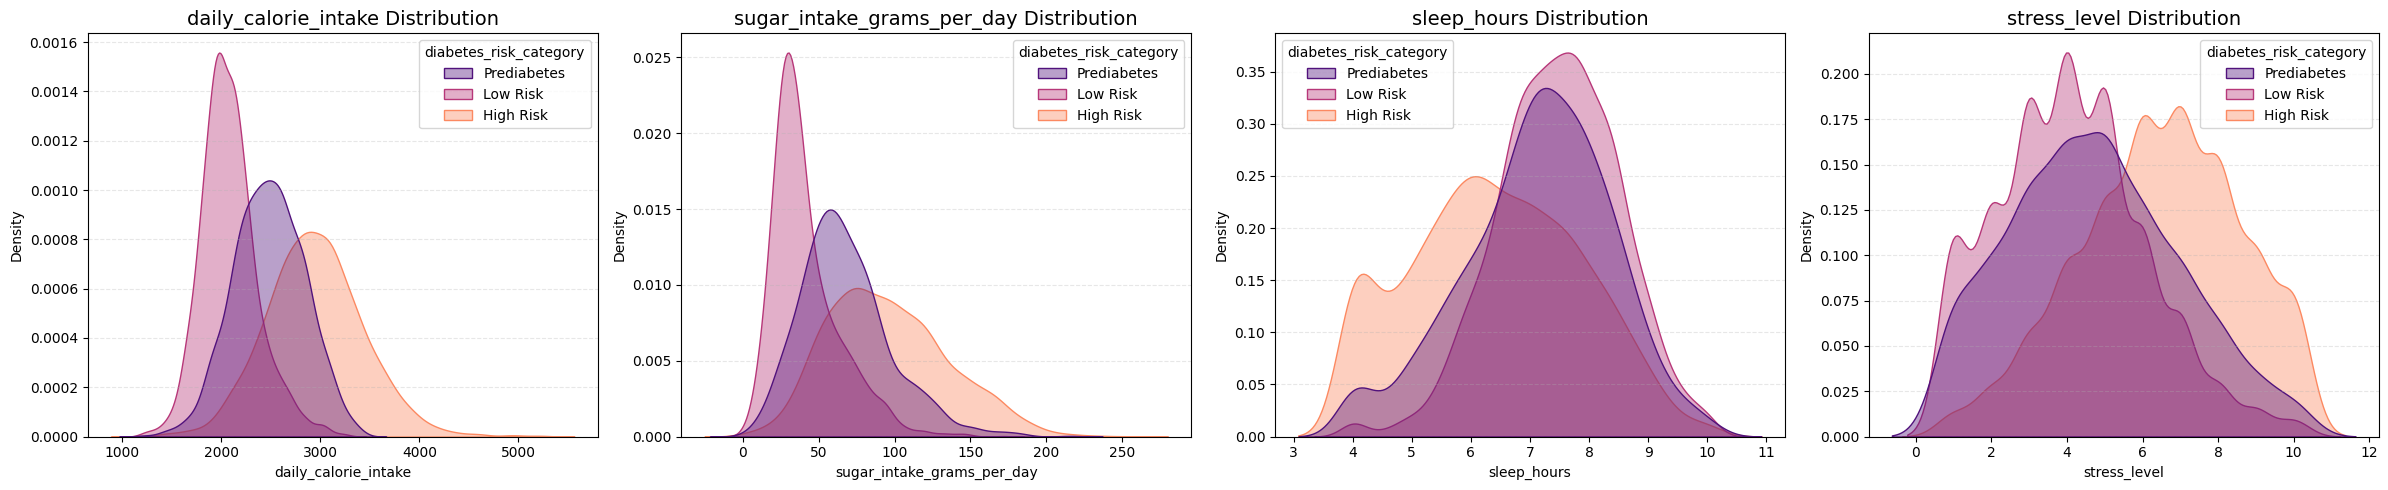

In [29]:
plot_multiple_comparison_kde(df, [ 'daily_calorie_intake', 'sugar_intake_grams_per_day', 'sleep_hours','stress_level'])


#### **1. Daily Calorie & Sugar Intake**
* **Observations:** These two features show massive separation. **Sugar Intake** is particularly striking: the **Low Risk** median is **35.4g**, while the **High Risk** median is **91.9g**—nearly triple the amount. **Calorie Intake** follows a similar steep trend.
* **Interpretation:** These are "primary drivers." The lack of significant overlap in sugar intake makes it a top-tier predictor, highlighting the direct impact of dietary habits on the risk score.

#### **2. Sleep Hours**
* **Observations:** There is a clear negative correlation: as risk increases, sleep duration decreases. **Low Risk** individuals average **7.5 hours**, while **High Risk** individuals drop to **6.3 hours**.
* **Interpretation:** Chronic sleep deprivation is known to affect insulin sensitivity. While there is more overlap here than in medical metrics, sleep hours provide the model with crucial lifestyle context.

#### **3. Stress Level**
* **Observations:** Self-reported stress levels are noticeably higher in the **High Risk** group (Median: **7.0**) compared to the **Low Risk** group (Median: **4.0**).
* **Interpretation:** Stress triggers cortisol production, which can raise blood sugar. The model can use this feature to capture psychological and environmental factors that physiological tests might miss.